# Singal To Noise All Models
 - Calculates the singal to nosie for all models in longrunmip for GMST
 - Fraction of models stable for windows for GMST
 
 PHD-9:
 * read_and_merge_netcdfs moved from longrunmip_loader to open_ds


In [3]:
import xarray as xr
import numpy as np
import pandas as pd
# import matplotlib.pyplot 
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import cftime
from importlib import reload
from dask.diagnostics import ProgressBar
import matplotlib.ticker as mticker
import os, sys
from glob import glob
import constants
sys.path.append(constants.MODULE_DIR)
import json
# Custom plots for signal to noise functions.
import sn_plotting as sn_plot
import xarray_class_accessors as xca
warnings.filterwarnings('ignore')
import open_ds
import signal_to_noise as sn
import xarray_extender as xce
import utils
from classes import ExperimentTypes

In [4]:
logger = utils.get_notebook_logger()

In [5]:
notebook_number='03'

In [14]:
variable = 'sic'
ROOT_DIR = os.path.join(constants.LONGRUNMIP_DIR, variable, 'regrid_retimestamped')
ROOT_DIR

'/g/data/w40/ab2313/PhD/longrunmip/sic/regrid_retimestamped'

# Loading Data

In [15]:
models_to_get = open_ds.get_models_longer_than_length()
utils.pprint_list(models_to_get, num_start_items=7)

lenght = 7
 0. ccsm3
 1. cesm104
 2. cnrmcm61
 3. hadcm3l
 4. ipslcm5a
 5. mpiesm11
 6. mpiesm12


In [16]:
files_to_open_experiment = open_ds.get_file_names_from_from_directory(ROOT_DIR,
                                                           ExperimentTypes.ABRUPT4X,
                                                           models_to_get)

files_to_open_control = open_ds.get_file_names_from_from_directory(ROOT_DIR,
                                                           ExperimentTypes.CONTROL,
                                                           models_to_get)
utils.pprint_list(files_to_open_experiment, num_start_items=5)

model='cesm104' - found_fname=None - No file found
lenght = 6
 0. sic_mon_CCSM3_abrupt4x_2120_g025.nc
 1. sic_mon_CNRMCM61_abrupt4x_1850_g025.nc
 2. sic_mon_HadCM3L_abrupt4x_1000_g025.nc
 3. sic_mon_IPSLCM5A_abrupt4x_1000_g025.nc
 4. sic_mon_MPIESM11_abrupt4x_4520_g025.nc


In [17]:
reload(open_ds)
control_ds = open_ds.read_and_merge_netcdfs(files_to_open_control, ROOT_DIR, logginglevel='DEBUG')
abrupt4x_ds = open_ds.read_and_merge_netcdfs(files_to_open_experiment, ROOT_DIR, logginglevel='DEBUG')
abrupt4x_ds

Opening files in /g/data/w40/ab2313/PhD/longrunmip/sic/regrid_retimestamped
Opening files /g/data/w40/ab2313/PhD/longrunmip/sic/regrid_retimestamped/sic_mon_CCSM3_control_1530_g025.nc
requested_length=100
Rename var='sic' to ccsm3
<xarray.Dataset>
Dimensions:  (time: 1530, lon: 144, lat: 72)
Coordinates:
  * time     (time) object 0001-12-31 00:00:00 ... 1530-12-31 00:00:00
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Data variables:
    sic      (time, lat, lon) float32 ...
Opening files /g/data/w40/ab2313/PhD/longrunmip/sic/regrid_retimestamped/sic_mon_CESM104_control_1000_g025.nc
requested_length=100
Rename var='sic' to cesm104
<xarray.Dataset>
Dimensions:  (time: 1000, lon: 144, lat: 72)
Coordinates:
  * time     (time) object 0001-12-31 00:00:00 ... 1000-12-31 00:00:00
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) fl

<xarray.Dataset>
Dimensions:   (time: 1200, lat: 72, lon: 144, depth: 1)
Coordinates:
  * time      (time) object 0001-12-31 00:00:00 ... 1200-12-31 00:00:00
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * depth     (depth) float64 0.0
Data variables:
    ccsm3     (time, lat, lon) float32 ...
    cnrmcm61  (time, lat, lon) float32 ...
    hadcm3l   (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    ipslcm5a  (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    mpiesm11  (time, depth, lat, lon) float32 ...
    mpiesm12  (time, depth, lat, lon) float32 nan nan nan nan ... nan nan nan
Attributes:
    length:   2120

In [18]:
abrupt4x_ds

<xarray.Dataset>
Dimensions:   (time: 1200, lat: 72, lon: 144, depth: 1)
Coordinates:
  * time      (time) object 0001-12-31 00:00:00 ... 1200-12-31 00:00:00
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * depth     (depth) float64 0.0
Data variables:
    ccsm3     (time, lat, lon) float32 ...
    cnrmcm61  (time, lat, lon) float32 ...
    hadcm3l   (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    ipslcm5a  (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    mpiesm11  (time, depth, lat, lon) float32 ...
    mpiesm12  (time, depth, lat, lon) float32 nan nan nan nan ... nan nan nan
Attributes:
    length:   2120

In [19]:
# Control space mean
control_ds_mean = control_ds.clima_ds.space_mean()

# Space mean and anomalmies
abrupt4x_anom = abrupt4x_ds.clima_ds.anomalies(control_ds)
abrupt4x_mean = abrupt4x_anom.clima_ds.space_mean()
abrupt4x_mean = abrupt4x_mean.compute()

ccsm3, cnrmcm61, hadcm3l, ipslcm5a, mpiesm11, mpiesm12, 

In [20]:
RUN_PARAMS = dict(end_window = 370)# 370 is standard
RUN_PARAMS['end_window']

370

In [38]:
stable_sn_ds, unstable_sn_ds =\
                                abrupt4x_mean.sn_ds.sn_multiwindow(control_ds_mean,
                                                     end_window=RUN_PARAMS['end_window'], step_window=2,
                                                                  logginglevel='ERROR')

ccsm3
start_window=20, end_window=370, step_window=2
20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, cnrmcm61
start_window=20, end_window=370, step_window=2
20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 

In [39]:
number_models_present = sn.count_over_data_vars(abrupt4x_mean, list(unstable_sn_ds.data_vars), dim='model')

unstable_number_da = sn.number_finite(unstable_sn_ds)
stable_number_da = sn.number_finite(stable_sn_ds)

unstable_number_da

<xarray.DataArray (window: 175, time: 1182, depth: 1)>
array([[[0],
        [5],
        [5],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [5],
        [5],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [5],
        [5],
        ...,
...
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [6],
        [6],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [6],
        [6],
        ...,
        [0],
        [0],
        [0]]])
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 ... 1176 1177 1178 1179 1180 1181 1182
  * window   (window) int64 20 22 24 26 28 30 32 ... 356 358 360 362 364 366 368
  * depth    (depth) float64 0.0

# Plots

In [25]:
variable_units = {'pr': 'mm/year', 'tas':r'($^{\circ}$C)', 'sic': 'units'}
variable_units

{'pr': 'mm/year', 'tas': '($^{\\circ}$C)', 'sic': 'units'}

### Mean Temp Plots

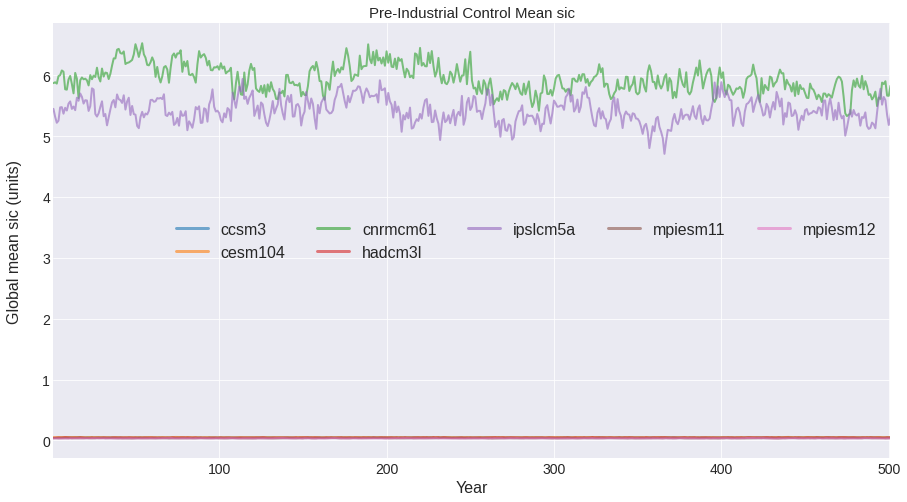

In [26]:

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(15,8))

time = control_ds_mean['time'].values
years = [t.year for t in time]
for var in list(control_ds_mean.data_vars):

    plot_kwargs = dict(alpha = 0.6,linewidth = 2)
        
    ax.plot(years, control_ds_mean[var].values, label=var, **plot_kwargs) #  - 273.15
    
ax.set_ylabel(f'Global mean {variable} ({variable_units[variable]})', size=16, labelpad=20)
ax.set_xlabel('Year', size=16)
ax.set_xlim(years[0], years[500])
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
leg = ax.legend(ncol = 5, fontsize=16)
[line.set_linewidth(3) for line in leg.get_lines()];
ax.set_title(f'Pre-Industrial Control Mean {variable}', fontsize=15);

fig.savefig(os.path.join(constants.IMAGE_SAVE_DIR_TOP_LEVEL, 
                         f'{notebook_number}_{variable}_multi_model_control_good_models_t500_year_axis.png'), 
            bbox_inches='tight')

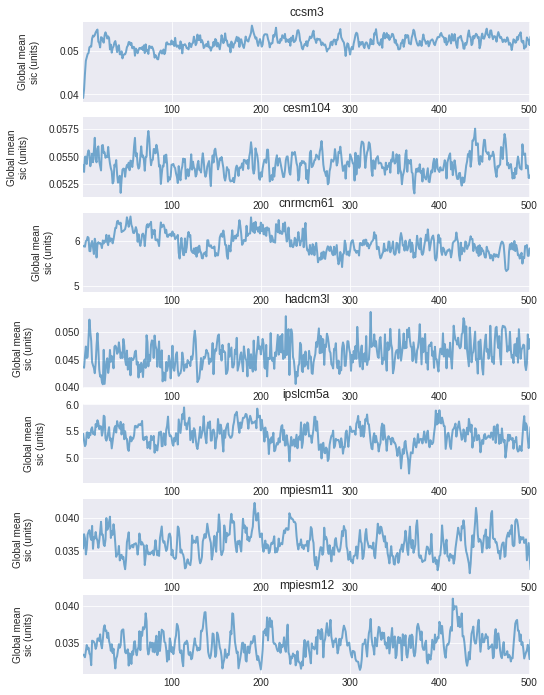

In [28]:

plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(8,12))

time = control_ds_mean['time'].values
years = [t.year for t in time]
dvars = list(control_ds_mean.data_vars)
for i,var in enumerate(dvars):
    
    ax = fig.add_subplot(len(dvars), 1, i + 1)

    ax.plot(years, control_ds_mean[var].values, label=var, alpha = 0.6,linewidth = 2)
    ax.set_xlim(years[0], years[500])
#     ax.set_ylim([10, 15])
    ax.set_title(var)

    ax.set_ylabel(f'Global mean\n{variable} ({variable_units[variable]})', labelpad=20)

fig.savefig(os.path.join(constants.IMAGE_SAVE_DIR_TOP_LEVEL,
                         f'{notebook_number}_{variable}_multi_model_control_good_models_t500_year_axis_split_model.png'), bbox_inches='tight')

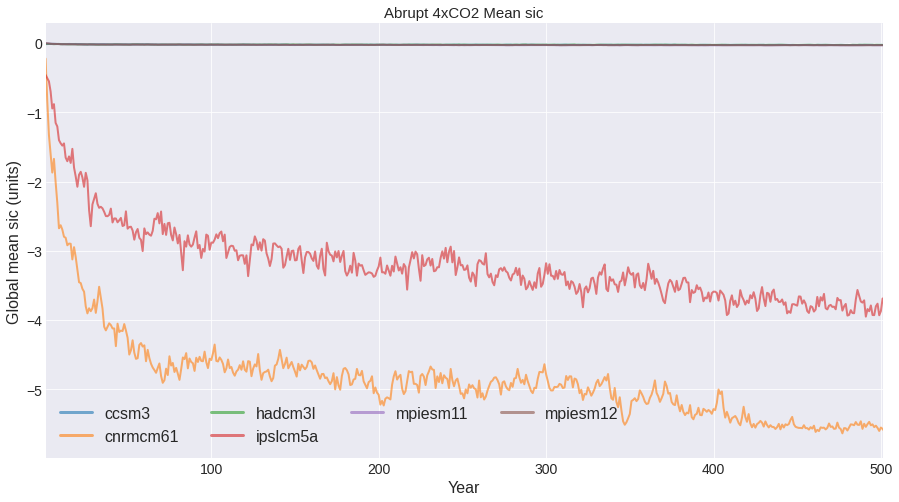

In [29]:
plt.style.use('seaborn-darkgrid')

data = abrupt4x_mean.where(abrupt4x_mean.time.dt.year < 13500, drop = True)

fig, ax = plt.subplots(figsize=(15,8))


# time = data['time'].values
for var in list(data.data_vars):
    
    # Removing nans from data
    da = data[var].dropna(dim='time')
    time = da.time.values
    years = [t.year for t in time]

    values = da.values
    
    line_kwargs = dict(alpha = 0.6,linewidth = 2)
    
    ax.plot(years, values, label=var, **line_kwargs)
    c = plt.gca().lines[-1].get_color()
#     ax.annotate(var, xy = (time[-1], values[-1]), color=c, zorder=1000, size=12)

ax.set_ylabel(f'Global mean {variable} ({variable_units[variable]})', size=16)
ax.set_xlabel('Year', size=16);
ax.set_title(f'Abrupt 4xCO2 Mean {variable}', fontsize=15);

# ax.set_ylim([0,15]);|
ax.set_xlim(years[0], years[500])
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
leg = ax.legend(ncol=4, fontsize = 16);
[line.set_linewidth(3) for line in leg.get_lines()];
fig.savefig(os.path.join(constants.IMAGE_SAVE_DIR_TOP_LEVEL, 
                         f'{notebook_number}_{variable}_good_models_mean_t500_year_axis.png'))

### Fraction of Models Stable

{'height': 15, 'width': 12, 'hspace': 0.3, 'vmin': 0, 'vmax': 8, 'step': 1, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x7ffa66297dc0>, 'line_color': 'limegreen', 'line_alpha': 0.65, 'ax2_ylabel': 'Global mean sic (units)', 'cbar_label': 'Number of Unstable Models', 'cbartick_offset': 0.5, 'title': 'LongRunMIP Signal-to-Noise for Multi-Window sic', 'label_size': 12, 'extend': 'neither', 'xlowerlim': None, 'xupperlim': 500, 'hieght': 15, 'cbar_ncols': 4, 'filter_max': True, 'levels': array([0, 1, 2, 3, 4, 5, 6, 7, 8]), 'cbar_xticklabels': array([0, 1, 2, 3, 4, 5, 6, 7]), 'cbar_ticks': array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])}


locator: <matplotlib.ticker.FixedLocator object at 0x7ffa4bb00eb0>
cbar x-tick labels = [0 1 2 3 4 5 6 7]
['ccsm3', 'cnrmcm61', 'hadcm3l', 'ipslcm5a', 'mpiesm11', 'mpiesm12']
0 1 2 3 4 5 

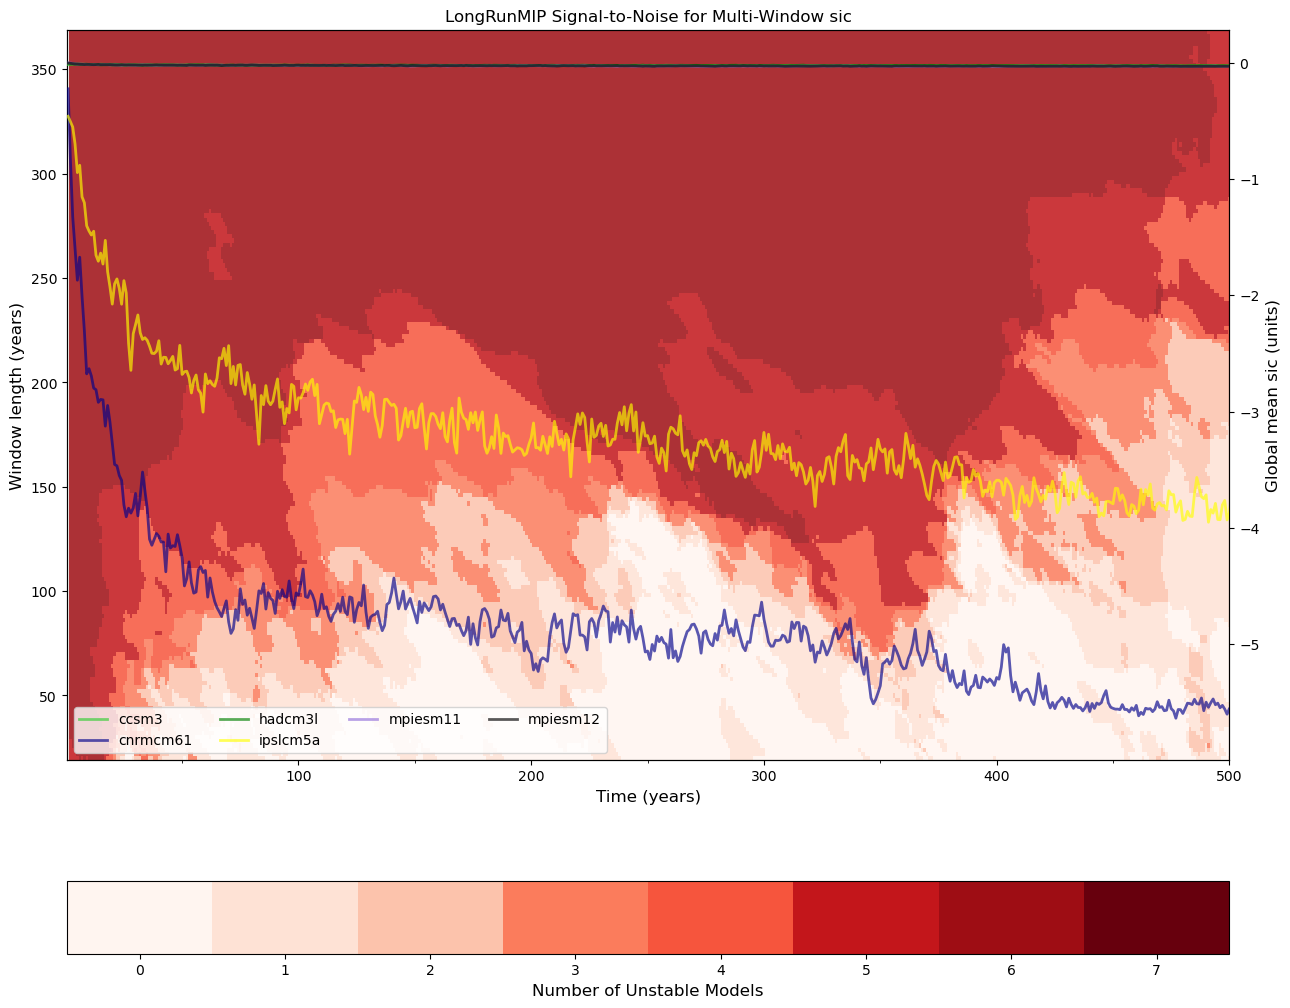

In [41]:
reload(sn_plot)
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax1, ax2, ax3,cbar = sn_plot.sn_multi_window_in_time(
    unstable_number_da, stable_number_da, abrupt4x_mean, 
    logginglevel='DEBUG', 
    hieght = 15, width = 12,
    vmin=0, vmax=8, step=1, cbartick_offset = 0.5,
    cmap='Reds',
    extend='neither', xupperlim = 500,
    cbar_label= 'Number of Unstable Models', 
    ax2_ylabel = f'Global mean {variable} ({variable_units[variable]})',
    title = f'LongRunMIP Signal-to-Noise for Multi-Window {variable}', cbar_ncols = 4, filter_max=True)

fig.savefig(f'{constants.IMAGE_SAVE_DIR_TOP_LEVEL}/{notebook_number}_{variable}_all_model_SN_multi_window_long_models_number_unstable', dpi=200, bbox_inches='tight')